<a href="https://colab.research.google.com/github/shoofiash/BootcampTask/blob/main/Yasmin%20Shofiyyah%20-%20Case%20Study%20Customer%20Churn%20Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

A lending company hired a data analyst to forecast which users would stop using their platform to make online payments. They had previously asked other consultants to create the model, but the consultant was unable to explain why the customer was predicted to churn or not based on the model, therefore the model could not be used because it was not transparent and provided no insight.

# Metadata

Here are some types of data that are useful in customer churn analysis:
- user_id: customer account number
- attrition_flag: customer status (Existing and Attrited).
- customer_age: age of the customer.
- gender: gender of customer (M for male and F for female).
- dependent_count: number of dependents of customers.
- education_level: customer education level (Uneducated, High School, Graduate, College, Post-Graduate, Doctorate, and Unknown).
- marital_status: customer's marital status (Single, Married, Divorced, and Unknown).
- income_category: customer income interval category (Less than 40K, 40K- 60k, 60K-80K, 80K-120K, 120K +, and Unknown. The income is on USD currency).
- card_category: type of card used (Blue, Silver, Gold, and Platinum).
months_on_book: period of being a customer (in months).
- total_relationship_count: the number of products used by customers in the bank.
- months_inactive_12_mon: period of inactivity for the last 12 months.
- contacts_count_12_mon: the number of interactions between the bank and the customer in the last 12 months.
- credit_limit: credit card transaction nominal limit in one period.
- total_revolving_bal: total funds used in one period.
- avg_open_to_buy: the difference between the credit limit set for the cardholder's account and the current balance.
- total_amt_chng_q4_q1: increase in customer transaction nominal between quarter 4 and quarter 1.
- total_trans_amt: total nominal transaction in the last 12 months.
- total_trans_ct: the number of transactions in the last 12 months.
- total_ct_chng_q4_q1: the number of customer transactions increased between quarter 4 and quarter 1.
- avg_utilization_ratio: percentage of credit card usage.


# Install & Load Library

In [ ]:
!pip install dalex
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

import dalex as dx

import scikitplot as skplt

%matplotlib inline

# Load Dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/bank_churn_dataset/bank_churn_data.csv")

# Data Inspection

The objective of this step is to identify data type suitability and missing data. If there is some null in the dataset, we have to analyze it first. Don't delete it immediately

In [ ]:
df

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

Alright, the data type from the dataset looks pretty fine. The next step is we need to check the missing values

In [ ]:
df.isna().sum()

user_id                     0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

There is no missing value on the data

Then we check the unique of each variable to replace the categorical variables into numeric

In [ ]:
for x in df.columns:
  print(f"unique of {x}")
  print(f"{df[x].unique()}")
  print()

unique of user_id
[768805383 818770008 713982108 ... 716506083 717406983 714337233]

unique of attrition_flag
['Existing Customer' 'Attrited Customer']

unique of customer_age
[45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]

unique of gender
['M' 'F']

unique of dependent_count
[3 5 4 2 0 1]

unique of education_level
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']

unique of marital_status
['Married' 'Single' 'Unknown' 'Divorced']

unique of income_category
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']

unique of card_category
['Blue' 'Gold' 'Silver' 'Platinum']

unique of months_on_book
[39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]

unique of total_relationship_count
[5 6 4 3 2 1]

unique of months_inactive_12_mon
[1 4 2 3 6 0 5]



Typecasting categorical variables into numeric

In [ ]:
df['attrition_flag'].replace(['Existing Customer','Attrited Customer'],[0,1],inplace=True)
df['gender'].replace(['M','F'],[1,0],inplace=True)
df['education_level'].replace(['Uneducated','High School','Graduate','College','Post-Graduate','Doctorate','Unknown'],[0,1,2,3,4,5,6],inplace=True)
df['marital_status'].replace(['Single', 'Married', 'Divorced', 'Unknown'],[0,1,2,3],inplace=True)
df['income_category'].replace(['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown'],[0,1,2,3,4,5],inplace=True)
df['card_category'].replace(['Blue','Silver','Gold','Platinum'],[0,1,2,3],inplace=True)

Check new data structure

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  int64  
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  int64  
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  int64  
 6   marital_status            10127 non-null  int64  
 7   income_category           10127 non-null  int64  
 8   card_category             10127 non-null  int64  
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

All the data type of object already removed. However, we also need to remove  User ID from dataset because we don't used it to forecast customer churn

In [ ]:
df = df.drop(["user_id"], axis = 1)

# Train-Test Split Data

Before we do the EDA, we have to train-test split first the data as a prevention step of data leakage

In [ ]:
x = df.drop(["attrition_flag"], axis=1)
y = df["attrition_flag"] 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    test_size=0.2,
    stratify = y,
    random_state=1000
)

# Explanatory Data Analysis

In [ ]:
x_train["attrition_flag"] = y_train

Let's check target distribution

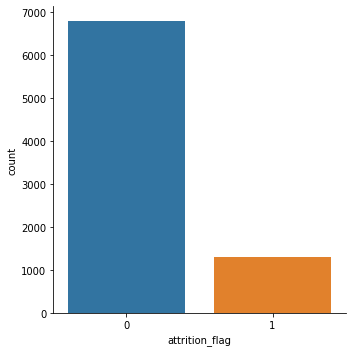

In [ ]:
sns.catplot(x="attrition_flag", kind="count", data=x_train)

In [ ]:
y_train.value_counts(normalize=True)

0    0.839279
1    0.160721
Name: attrition_flag, dtype: float64

We can observe there imbalance case in our dataset. We can solve this in two ways:
- While modeling, by adding weight on model parameter
- Post-modeling, by changing classification threhold to optimize metrics such as F1-Score, precision, recall, etc
- Pre-modeling, by doing resamping such as oversampling, downsampling, and mixed sampling

We gonna do pre-modelling oversampling if necessary

Next we gonna check multicolinearity for each variable

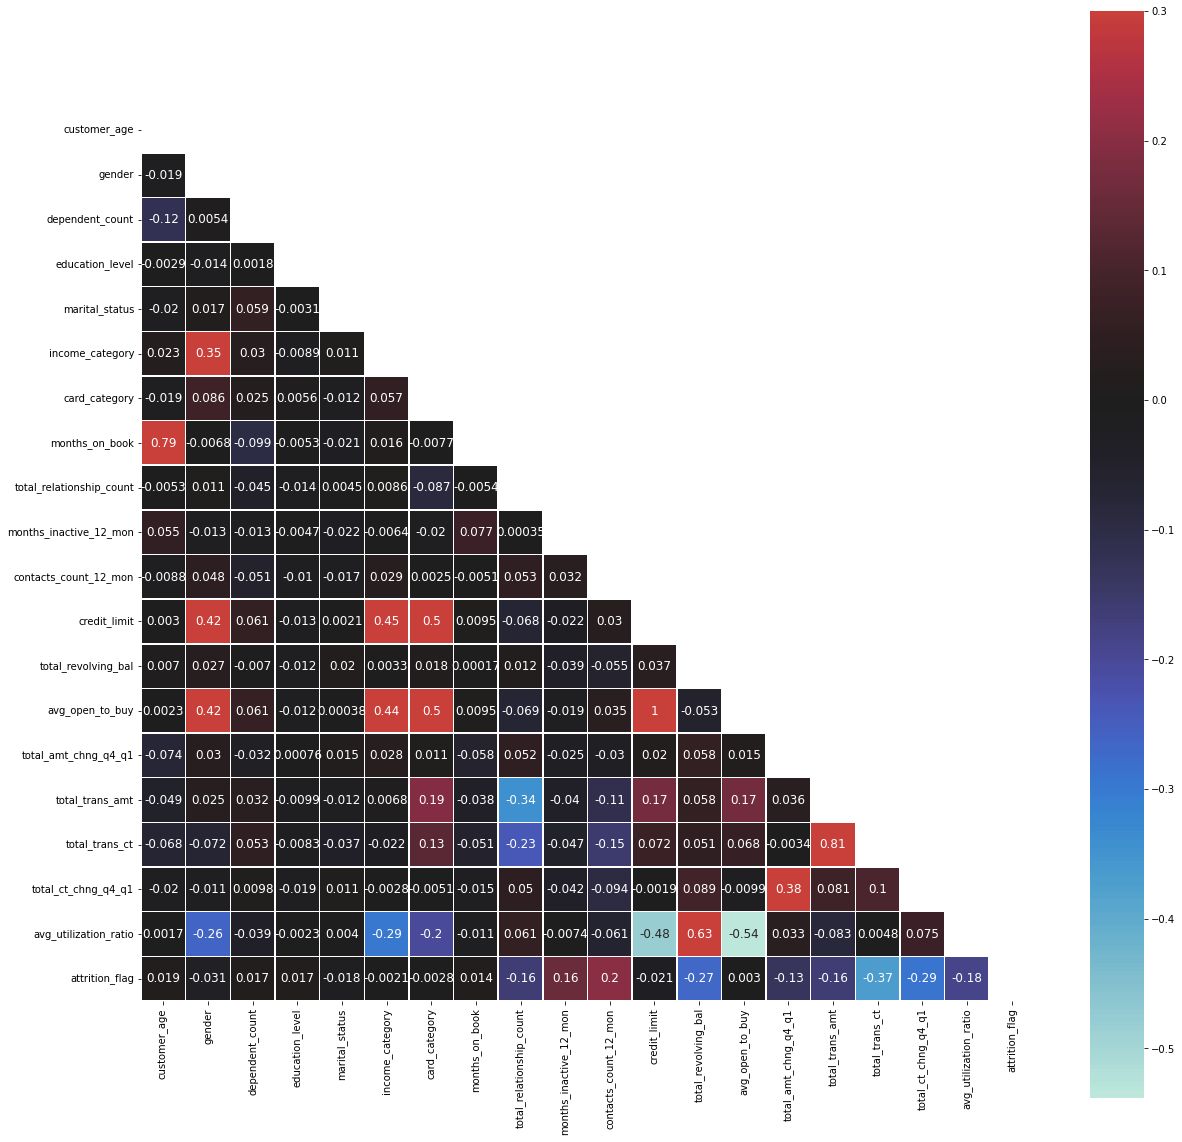

In [ ]:
corr = x_train.corr()
masking = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20,20))

cmap = sns.diverging_palette(230,20,20,as_cmap=True)

sns.heatmap(
    corr,
    mask=masking,
    vmax=.3,
    center=0,
    square=True,
    linewidths=.5,
    annot=True,
    annot_kws={"size":12}
);

We observe multiple multicolinearity between predictor variables such as customer age vs months on book, credit limit vs avg open to buy, total trans amt vs total trans ct, etc. We could delete the variable that is not have strong correlation with attrition flag, however in this case we not delete it first. The objective on making the heatmap is to identify which variable that might correlate with each other

# 1. Analyze The Correlation Between Variable and Attrition Flag

# Categorical Data vs Attrition Flag

In [ ]:
def prop_agg(df, y, x):
  temp_df = df.groupby([y,x], as_index = False).size()
  temp_df['prop'] = temp_df['size'] / temp_df.groupby(y)['size'].transform('sum')
  return temp_df

# a. Attrition Flag vs Education Level

In [ ]:
prop_agg(x_train, "education_level", "attrition_flag")

,education_level,attrition_flag,size,prop
0,0,0,999,0.838087
1,0,1,193,0.161913
2,1,0,1377,0.850000
3,1,1,243,0.150000
4,2,0,2096,0.843121
5,2,1,390,0.156879
6,3,0,682,0.847205
7,3,1,123,0.152795
8,4,0,339,0.816867
9,4,1,76,0.183133


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


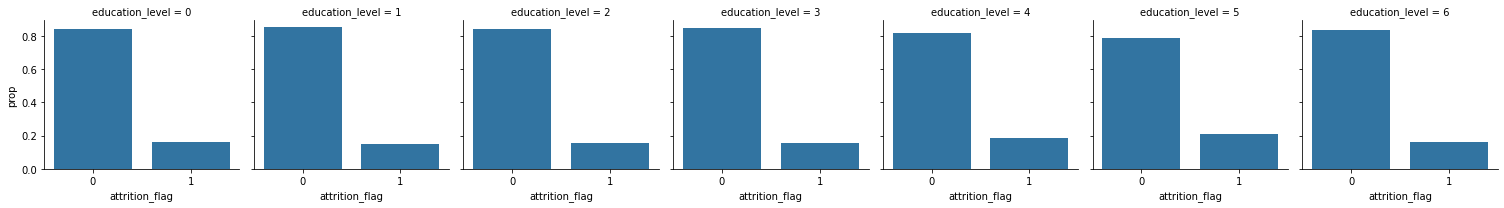

In [ ]:
g = sns.FacetGrid(
    data = prop_agg(x_train, "education_level", "attrition_flag"),
    col = "education_level"
)
g.map(sns.barplot, "attrition_flag", "prop");

We can observe that there is slightly correlation between attrion flag and education level. At education level 5 (Doctorate) has a large number of possible to churn. While education level 1 (High School) has the lowest number of possible to churn.

# b. Attrition Flag vs Gender



In [ ]:
prop_agg(x_train, "gender", "attrition_flag")

,gender,attrition_flag,size,prop
0,0,0,3548,0.828585
1,0,1,734,0.171415
2,1,0,3251,0.851270
3,1,1,568,0.148730


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


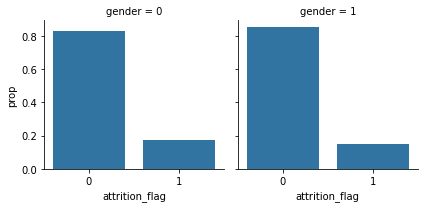

In [ ]:
g = sns.FacetGrid(
    data = prop_agg(x_train, "gender", "attrition_flag"),
    col = "gender"
)
g.map(sns.barplot, "attrition_flag", "prop");

We can observe that there is no significant correlation between gender and attrition flag because they seems not different one to another. Therefore, we can remove this feature because it has no benefit to improve model accuracy

# Numerical Data vs Attrition Flag

# c. Attrition Flag vs Customer Age

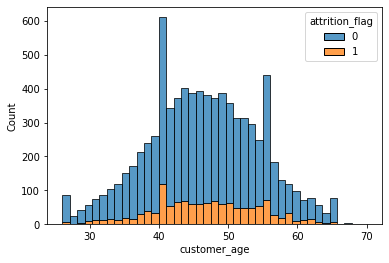

In [ ]:
sns.histplot(x = "customer_age", hue = "attrition_flag", data = x_train, multiple='stack');

We can observe that the highest probability of customer attrition is at 40 y.o (by looking for the variable 1)

# d. Attrition Flag vs Period of Being A Customer (in months)

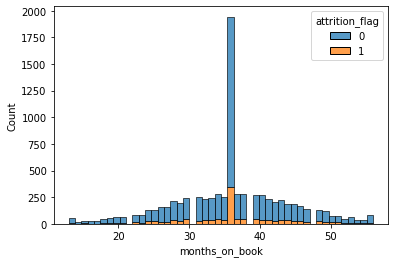

In [ ]:
sns.histplot(x = "months_on_book", hue = "attrition_flag", data = x_train, multiple='stack');

From the chart above, we can conclude that the newest customer has a low chance to churn, these might be because they are still new. Therefore this customer become potential if the bank can keep it. Also, if we discovered the customer above 50, they also have low chance to churn. The highest number of attrition is between 30-40.

# e. Attrition Flag vs The Number of Interactions Between The Bank and The Customer (in the last 12 monts)

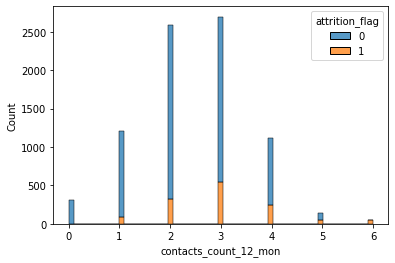

In [ ]:
sns.histplot(x = "contacts_count_12_mon", hue="attrition_flag", data = x_train, multiple='stack');

From the chart above, we can conclude that the more customer engage with the bank, the more decrease number of people that existing. After the number 3, the chart become lower and lower until the number 6 where there is only slight number of existing customer

#2. Modeling

Before we start modeling, we need to drop "Attrition Flag" column from x_train

In [ ]:
x_train = x_train.drop(["attrition_flag"], axis=1)

The models that will be used is KNN, Decision Tree, Random Forest, SVM RBF, and XGBoost. We use several models to know which model are suit with this dataset to forecast customer attrition

In [ ]:
y_train.value_counts(normalize=True)

0    0.839279
1    0.160721
Name: attrition_flag, dtype: float64

This number will be used as class weight

# KNN

In [ ]:
# define the model
knn_clf = KNeighborsClassifier(
    n_neighbors = 5,
)

In [ ]:
# fitting model to data
knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
# knn prediction
knn_pred = knn_clf.predict(x_test)
knn_pred_proba = knn_clf.predict_proba(x_test)

In [ ]:
# evaluation
pd.DataFrame(metrics.classification_report(y_test, knn_pred, target_names=['Existing','Attrition'], output_dict=True))

,Existing,Attrition,accuracy,macro avg,weighted avg
precision,0.915588,0.702811,0.889437,0.809200,0.881456
recall,0.956496,0.538462,0.889437,0.747479,0.889437
f1-score,0.935595,0.609756,0.889437,0.772676,0.883326
support,1701.000000,325.000000,0.889437,2026.000000,2026.000000


From the evaluation above can be done by looking f1-score in attrition column. **The f1-score for KNN model is 0.60**.

# Decision Tree

In [ ]:
# define the model
dc_clf = DecisionTreeClassifier(
    max_depth = 5,
    ccp_alpha = 0.001,
    class_weight = {0: 0.160721, 1:0.839279}
)

In [ ]:
# fitting model to data
dc_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight={0: 0.160721, 1: 0.839279},
                       max_depth=5)

In [ ]:
# decision tree prediction
dc_pred = dc_clf.predict(x_test)
dc_pred_proba = dc_clf.predict_proba(x_test)

In [ ]:
# evaluation
pd.DataFrame(metrics.classification_report(y_test, dc_pred, target_names=['Existing','Attrition'], output_dict=True))

,Existing,Attrition,accuracy,macro avg,weighted avg
precision,0.978764,0.618644,0.894867,0.798704,0.920996
recall,0.894180,0.898462,0.894867,0.896321,0.894867
f1-score,0.934562,0.732748,0.894867,0.833655,0.902188
support,1701.000000,325.000000,0.894867,2026.000000,2026.000000


From the evaluation above, it can be infered that Descision Tree show a better permorfance than KNN by looking f1-score in attrition column. **The f1-score for Decision Tree model is 0.73**.

# Random Forest

In [ ]:
# define the model
rf_clf = RandomForestClassifier(
    random_state=1000,
    n_estimators=1000,
    class_weight = {0: 0.160721, 1:0.839279}
)

In [ ]:
# fitting model to data
rf_clf.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.160721, 1: 0.839279},
                       n_estimators=1000, random_state=1000)

In [ ]:
# random forest prediction
rf_pred = rf_clf.predict(x_test)
rf_pred_proba = rf_clf.predict_proba(x_test)

In [ ]:
# evaluation
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['Existing','Attrition'], output_dict=True))

,Existing,Attrition,accuracy,macro avg,weighted avg
precision,0.952273,0.906015,0.946199,0.929144,0.944852
recall,0.985303,0.741538,0.946199,0.863421,0.946199
f1-score,0.968506,0.815567,0.946199,0.892037,0.943973
support,1701.000000,325.000000,0.946199,2026.000000,2026.000000


From the evaluation above, it can be infered that Random Forest show a better permorfance than KNN and Decision Tree by looking f1-score in attrition column. **The f1-score for Random Forest model is 0.81**.

# SVM RBF

In [ ]:
# define the model
svm_clf = SVC(
    random_state = 1000,
    probability=True,
    class_weight = {0: 0.160721, 1:0.839279}
)

In [ ]:
# fitting model to data
svm_clf.fit(x_train, y_train)

SVC(class_weight={0: 0.160721, 1: 0.839279}, probability=True,
    random_state=1000)

In [ ]:
# SVM RBF prediction
svm_pred = svm_clf.predict(x_test)
svm_pred_proba = svm_clf.predict_proba(x_test)

In [ ]:
# evaluation
pd.DataFrame(metrics.classification_report(y_test, svm_pred, target_names=['Existing','Attrition'], output_dict=True))

,Existing,Attrition,accuracy,macro avg,weighted avg
precision,0.925727,0.316667,0.709279,0.621197,0.828025
recall,0.710758,0.701538,0.709279,0.706148,0.709279
f1-score,0.804124,0.436364,0.709279,0.620244,0.745130
support,1701.000000,325.000000,0.709279,2026.000000,2026.000000


From the evaluation above, it can be infered that SVM RBF show a bad permorfance rather than the other models by looking f1-score in attrition column. **The f1-score for SVM RBF model is 0.43**.

# XGBoost

In [ ]:
# define the model
xgb_clf = XGBClassifier(
    random_state=1000,
    n_estimators=1000,
    class_weight = {0: 0.160721, 1:0.839279}
)

In [ ]:
# fitting model to data
xgb_clf.fit(x_train, y_train)

XGBClassifier(class_weight={0: 0.160721, 1: 0.839279}, n_estimators=1000,
              random_state=1000)

In [ ]:
# XGBoost prediction
xgb_pred = xgb_clf.predict(x_test)
xgb_pred_proba = xgb_clf.predict_proba(x_test)

In [ ]:
# evaluation
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['Existing','Attrition'], output_dict=True))

,Existing,Attrition,accuracy,macro avg,weighted avg
precision,0.982353,0.904908,0.969891,0.943630,0.969930
recall,0.981775,0.907692,0.969891,0.944734,0.969891
f1-score,0.982064,0.906298,0.969891,0.944181,0.969910
support,1701.000000,325.000000,0.969891,2026.000000,2026.000000


From the evaluation above, it can be infered that XGBoost show the best permorfance rather than the other models by looking f1-score in attrition column. **The f1-score for Random Forest model is 0.90**. Therefore, it is suitable to use XGBoost to identify which customer that likely to churn on this dataset

# 3. Why we have to use XGBoost model on identify customer churn rather than not use model at all?

There are some metrics that applied to analyze the performance of models. There are two type of goals in performance metrics. One type being focused on the direct performance of a specific method on a specific dataset and the other type being focused on the staying power and reproducibility of the method (Duchemin and Ricardo, 2021).

*Duchemin R. and Ricardo M. Forecasting customer churn: Comparing the performance of statistical methods on more than just accuracy. Journal of Supply Chain Management Science, 2021, 2(3-4): 115-137*.

Receiver Operator Characteristic (ROC) curve is a graphical plot used to show the diagnostic ability of binary classifiers.

A ROC curve is constructed by plotting the true positive rate (TPR) against the false positive rate (FPR). The true positive rate is the proportion of observations that were correctly predicted to be positive out of all positive observations (TP/(TP + FN)). Similarly, the false positive rate is the proportion of observations that are incorrectly predicted to be positive out of all negative observations (FP/(TN + FP)).

The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

Chan C. What is a ROC Curve and How to Interpret It, https://www.displayr.com/what-is-a-roc-curve-how-to-interpret-it/


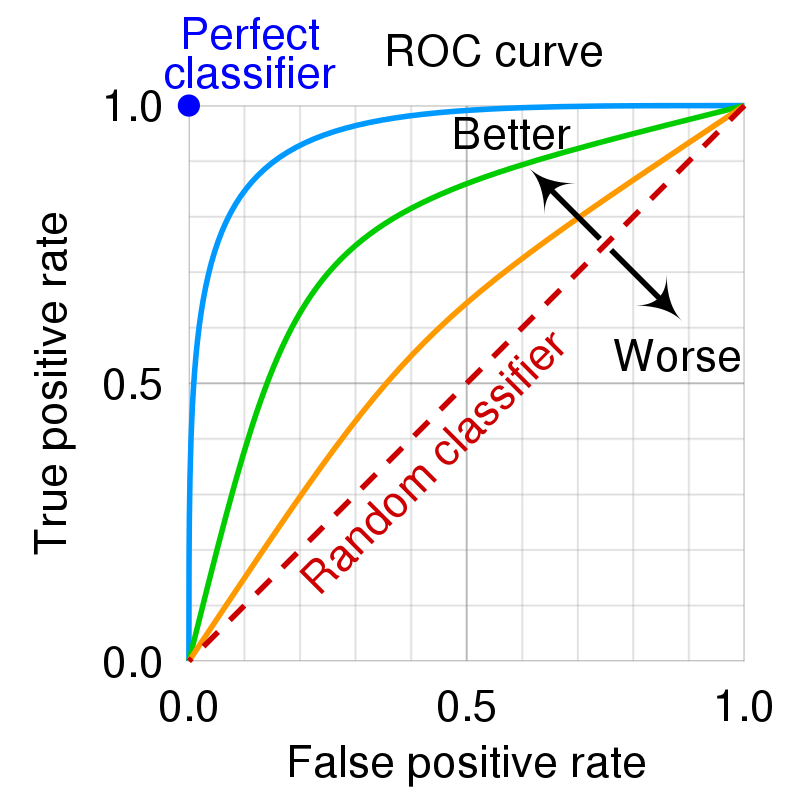

Now, let's take a look at the ROC of XGBoost

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


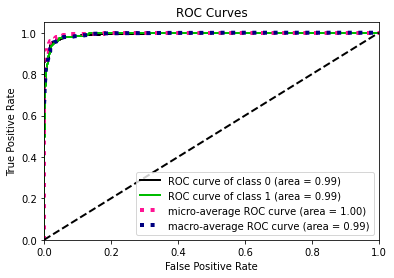

In [ ]:
skplt.metrics.plot_roc_curve(y_test, xgb_pred_proba);

From the graphic above, we can determine that XGBoost has a good performance in identify customer attrition. The ROC curve almost reach 1, which is can be infered that TPR almost have the same number with FPR. That's why this model can be an effective way to identify customer attrition. Because not only fast in determine the attrition customer, but also has a good performance

# 4. How we interprate knowledge from model?

As I mentioned before, XGBoost has a great performance on identify customer attrition. But, what else can we know beside f1-score and ROC? Then we need to do explanatory model analysis to made the data more interpretable

In [ ]:
# initiate explainer for XGBoost model
churn_xgb_exp = dx.Explainer(xgb_clf, x_train, y_train, label = "XGBoost Interpretation")

Preparation of a new explainer is initiated

  -> data              : 8101 rows 19 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 8101 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f125a7c1b90> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 2.88e-09, mean = 0.161, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.429, mean = 4.04e-06, max = 0.452
  -> model_info        : package xgboost

A new explainer has been created!


In [ ]:
# visualize permutation feature importance for XGBoost model
churn_xgb_exp.model_parts().plot()

From the graph above, we can infered that the top three of variables that important in the dataset that can make customer churn are total_trans_ct, total_trans_amt, and total_amt_chng_q4_q1. 

How they know why these three are the important variables? We can check the median from the boxplot

In [ ]:
var_name = x_train.select_dtypes(include = ['int64', 'float64'])

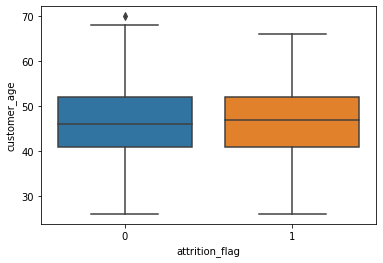

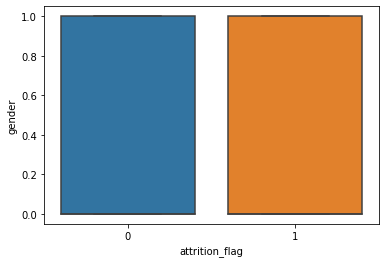

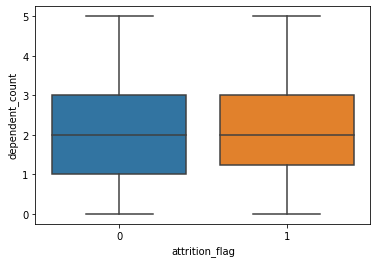

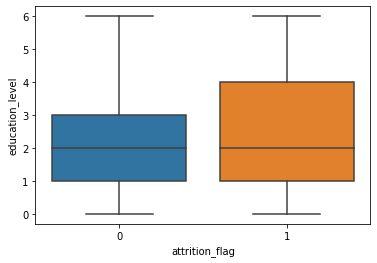

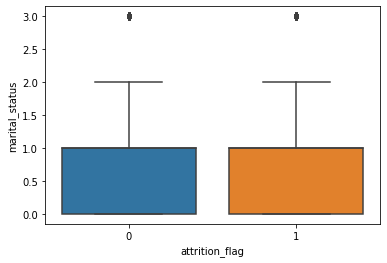

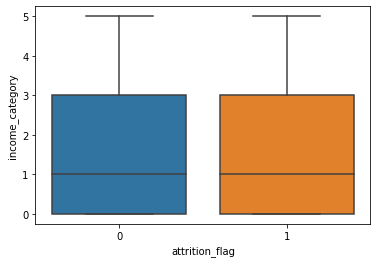

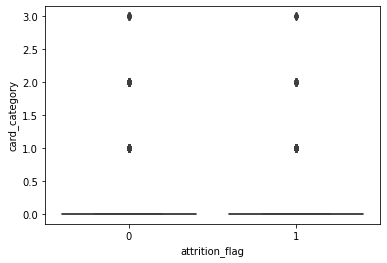

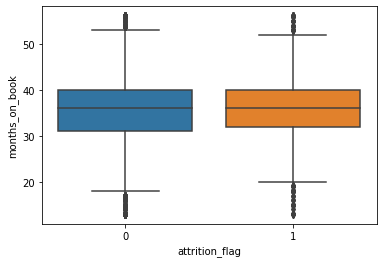

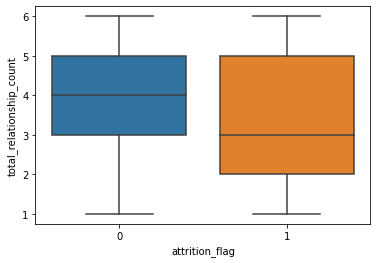

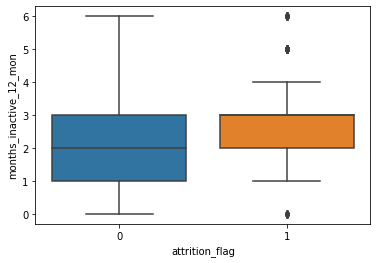

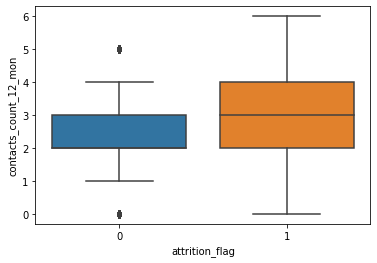

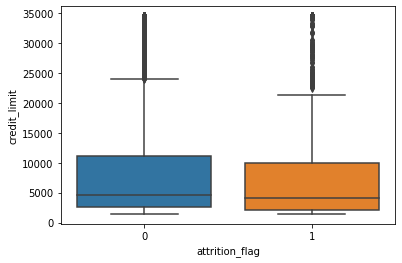

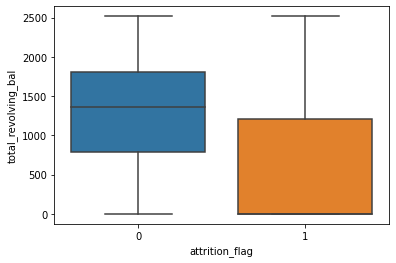

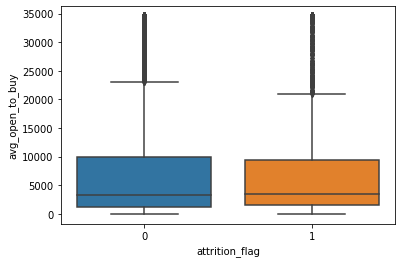

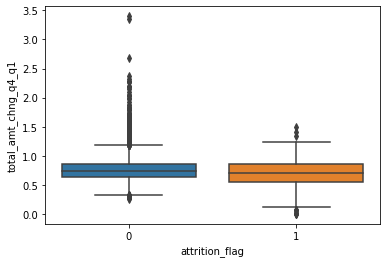

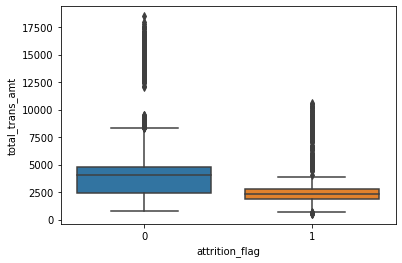

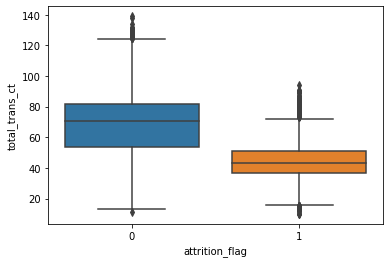

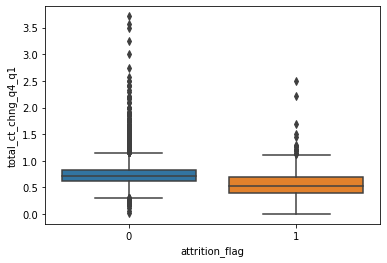

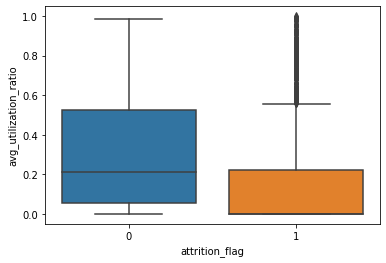

In [ ]:
for col_names in var_name:
  plt.figure()
  sns.boxplot(x = y_train, y = x_train[col_names]);

The more difference median that made between existing or not, the more important the variable become.

In [ ]:
# create partial dependence plot of XGBoost model
churn_xgb_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 19/19 [00:23<00:00,  1.22s/it]


From the partial dependence plot above, we can infered that
- There is no significant that can make the customer churn or retain by looking variable of gender, age, dependent count, education level, marital status, income category, card category, month inactive 12 months, months on book, credit limit, avg open to buy, and avg utilization ration
- There is slight effect that can make the customer churn by looking the variable of total relationship count (>2 number of products that being used by customer can increase chance to retain), contact count 12 months (the more people interact with bank, the more people likely to churn), total revolving bal (the more total fund used in one period, the more people likely to retain), total amt chng q4-q1 (the more higher transaction between q4 and q1, the more peole likely to retain).
- There is a significant effect that can make the customer churn by looking the variable of total trans amt (the higher total nominal of transaction, the more people likely to churn. Especially at 10k) and total trans ct (the higher number of transaction, the more people likely to retain).

From the explanation above, there are several recommendation that can be applied to the business department
- Use XGBoost Models to forecast which customer are likely to churn. 
- Give reward for the customer that made high number of transaction. The more frequent transaction, the more customer will retain. If the number of transaction become higher from month to month, the business department can give some poin or something. Because from the feature of total_amt_chng_q4_q1, there are slightly effect with the customer retain
- Identify why if the customer do the high nominal of transaction make the customer become churn. Is there any problem with the security or the bank can afford big amount of total nominal.
- Identify why if the customer interact more with bank can lead to customer churn. Is there any problem with the customer services? Is the complain flow too complicated for the customer?
- Give event of buy 1 get 1 product. By customer use more than two products, it can increase the probability of customer retain.